# Example to use the Dynamic Component Analysis (DyCA) algorithm 

In this example, we will use the DyCA algorithm to perform a dimensionality reduction on the simulated data.
These data are in the following format:
$$
    Q = Q_D + Q_{CN} + N = WX + \Psi \Xi + N.
$$
Where: $Q_D$ is the deterministic part, $Q_{CN}$ is the component noise, and $N$ is the additive noise. $W$ and $\Psi$ are the mixing matrices, $X$ and $\Xi$ are the latent variables, and $N$ is the uncorrelated noise.

The data is generated solving the Rössler or Lorenz system and adding noise to the solution. 

All data can be found: ./example_data/
with following structure:
{attractorname}\_{componentnoise}\_{additivenoise}.csv

For this example, we will use the data generated with the Rössler system, with component noise = 0 dB and additive noise = 70 dB.

For citing the DyCA algorithm, please use the following reference:
```bibtex
@ARTICLE{10.3389/fams.2024.1456635,
AUTHOR={Uhl, Christian  and Stiehl, Annika  and Weeger, Nicolas  and Schlarb, Markus  and Hüper, Knut },
TITLE={Disentangling dynamic and stochastic modes in multivariate time series},   
JOURNAL={Frontiers in Applied Mathematics and Statistics},      
VOLUME={Volume 10 - 2024},
YEAR={2024},
URL={https://www.frontiersin.org/journals/applied-mathematics-and-statistics/articles/10.3389/fams.2024.1456635},
DOI={10.3389/fams.2024.1456635},
ISSN={2297-4687}}
```

DOI: [10.3389/fams.2024.1456635](https://doi.org/10.3389/fams.2024.1456635)

### We assume that we do not know the underlying dynamics of the system. 

#### 1. We need to estimate the number of linear components m in the data.

In [21]:
!pip install dyca
!pip install matplotlib
!pip install numpy

from dyca import dyca, reconstruction
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [22]:
# Load the data and set the time vector (in this case, the time vector is just a linearly spaced vector from 0s to 100s)
signal = np.genfromtxt('./example_data/roessler_0_70.csv', delimiter=',')
time = np.linspace(0, 100, signal.shape[1])

In [23]:
# To get the number of linear components m
result_dyca = dyca(signal.transpose(), time_index=time)
eigenvalues = result_dyca['generalized_eigenvalues']

Text(0.5, 1.0, 'DyCA generalized eigenvalues')

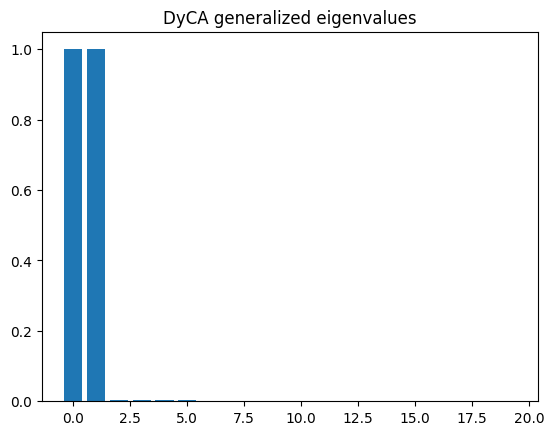

In [24]:
# Plot the eigenvalues
fig = plt.figure()
plt.bar(range(len(eigenvalues)), eigenvalues)
plt.title('DyCA generalized eigenvalues')

In the graphic above we can see, that the number of linear components is 2. Because the first two components are close to 1, while the third and following components are close to 0.
$$
    \text{m} = 2
$$

#### 2. We need to estimate the dimension n of the underlying deterministic system.
For that we run the DyCA algorithm a second time with the signal, time vector and the number of linear components m. After plotting the singular values, we can extract the dimension n of the underlying deterministic system.

In [25]:
m = 2
result_dyca = dyca(signal.transpose(), time_index=time, m=m)
eigenvalues = result_dyca['generalized_eigenvalues']
singular_values = result_dyca['singular_values']

Text(0.5, 1.0, 'SVD of Correlation Projectionmatrix')

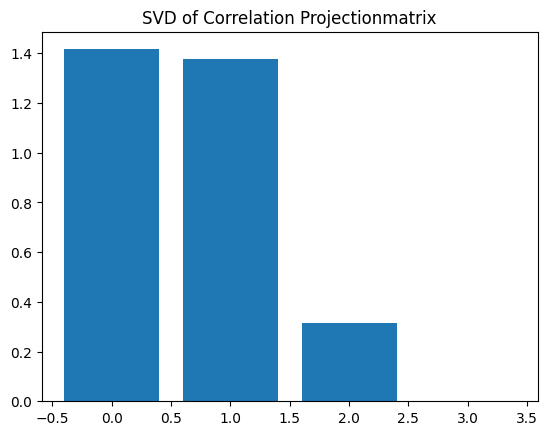

In [26]:
# plotting the singular values
fig = plt.figure()
plt.bar(range(len(singular_values)), singular_values)
plt.title('SVD of Correlation Projectionmatrix')

From the figure above we can extract that the number of nonlinear components is 1:
$$
    \text{n} = 3.
$$

#### 3. We can now run the DyCA algorithm with the number of linear and nonlinear components.

In [27]:
m = 2
n = 3
result_dyca = dyca(signal.transpose(), time_index=time, n=n, m=m)

amplitudes = result_dyca['amplitudes']
eigenvalues = result_dyca['generalized_eigenvalues']
singular_values = result_dyca['singular_values']

Text(0.5, 0, '$x_{3}$')

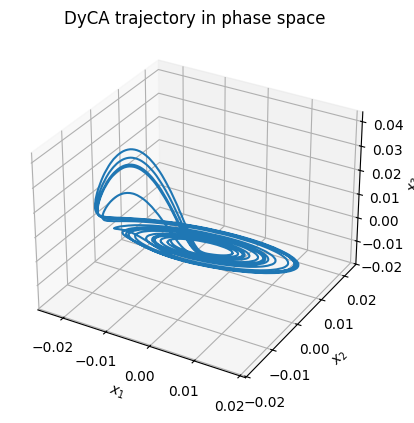

In [28]:
# plotting the amplitudes

ax3 = plt.axes(projection='3d')
ax3.plot3D(amplitudes[0, :],
            amplitudes[1, :],
            amplitudes[2, :])
plt.title('DyCA trajectory in phase space')
ax3.set_xlabel('$x_{1}$')
ax3.set_ylabel('$x_{2}$')
ax3.set_zlabel('$x_{3}$')




#### 4. We can reconstruct the signal Q using the reconstruction() function. (Optional, can be used for Denoising)  

Text(0, 0.5, 'Signalamplitude')

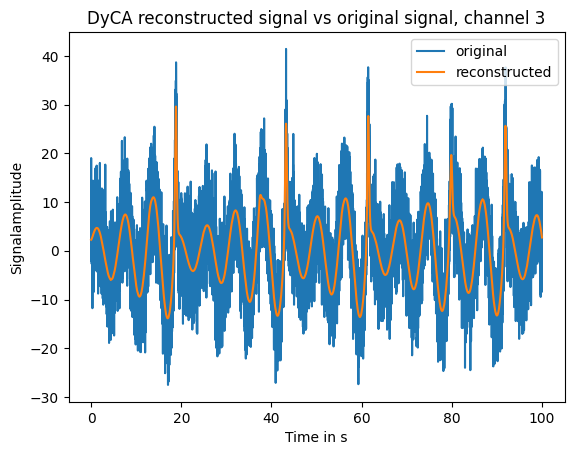

In [29]:
result_reconstruction = reconstruction(signal, amplitudes)

modes = result_reconstruction['modes']
reconstructedsignal = result_reconstruction['reconstruction']
cost = result_reconstruction['cost']

# plotting the third channel of the reconstructed signal and the noise signal
plt.figure()
plt.plot(time, signal[2, :], time, reconstructedsignal[2, :])
plt.legend(['original', 'reconstructed'])
plt.title('DyCA reconstructed signal vs original signal, channel 3')
plt.xlabel('Time in s')
plt.ylabel('Signalamplitude')